In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Datasets/UNSW-NB15/UNSW_NB15_testing-set.csv'

data = pd.read_csv(file_path)

In [ ]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
#Preprocessing Techniques

# 1) Label Encoding
#Step 1
categorical_columns = ['proto', 'service', 'state']
print(data[categorical_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   proto    175341 non-null  object
 1   service  175341 non-null  object
 2   state    175341 non-null  object
dtypes: object(3)
memory usage: 4.0+ MB
None


In [ ]:
print(data[categorical_columns].head())

  proto service state
0   tcp       -   FIN
1   tcp       -   FIN
2   tcp       -   FIN
3   tcp     ftp   FIN
4   tcp       -   FIN


In [ ]:
#Step 2

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for columns in categorical_columns:
  data[columns] = encoder.fit_transform(data[columns])

print(data[categorical_columns].head())

   proto  service  state
0    113        0      2
1    113        0      2
2    113        0      2
3    113        3      2
4    113        0      2


In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

x = data.drop(columns=['id','attack_cat','label'])
y = data['label']

chi2_selector = SelectKBest(score_func = chi2, k=42)
x_selector = chi2_selector.fit_transform(x,y)

selected_features_chi2 = x.columns[chi2_selector.get_support()]
print(selected_features_chi2)

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')


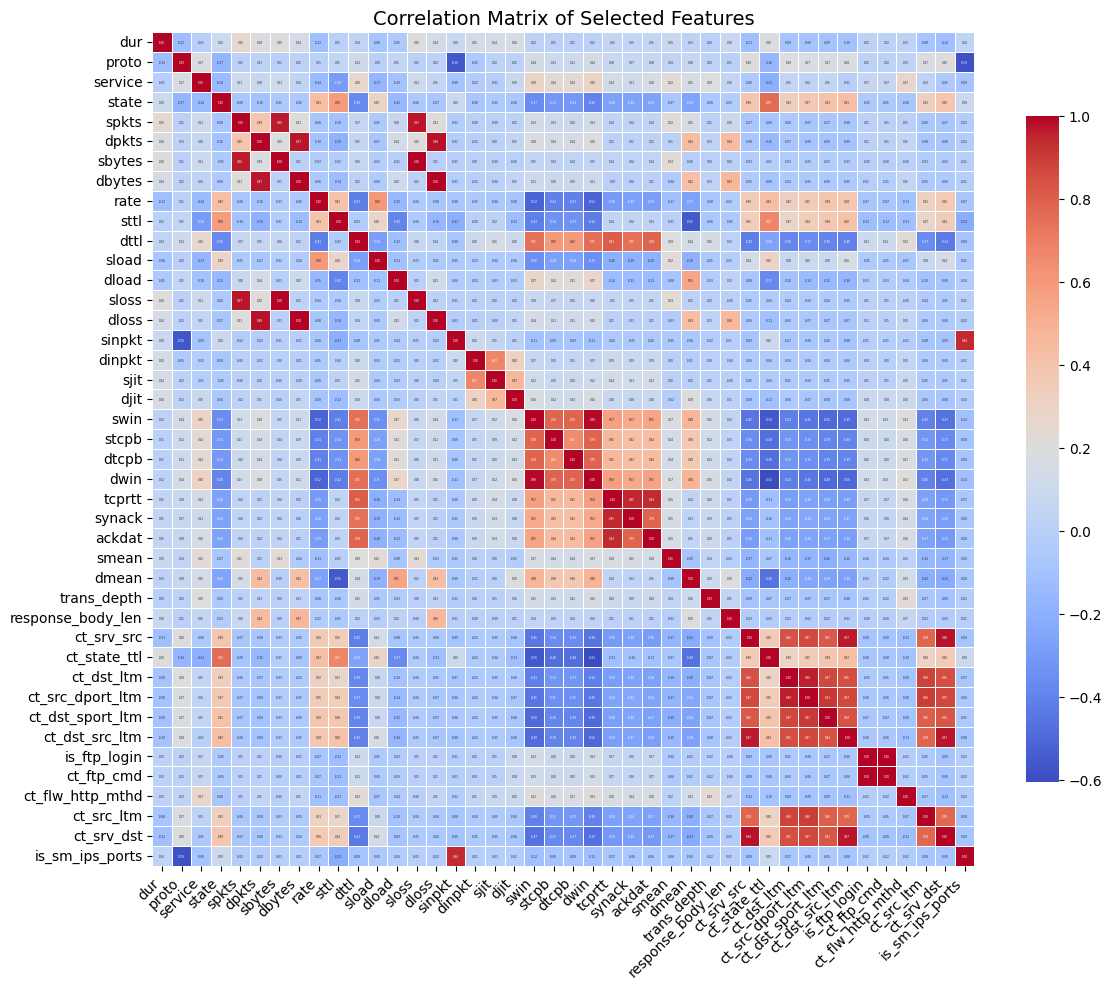

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe with selected features
selected_data = data[selected_features_chi2]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the correlation matrix with improved readability
plt.figure(figsize=(12, 10))  # Increase the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={"size": 2},  # Reduce font size of annotations
            cbar_kws={'shrink': 0.8},  # Shrink color bar to avoid excessive space usage
            linewidths=0.5)  # Add slight separation between cells
plt.title("Correlation Matrix of Selected Features", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0, ha='right')  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
print(selected_data.head())

        dur  proto  service  state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478    113        0      2      6      4     258     172  74.087490   
1  0.649902    113        0      2     14     38     734   42014  78.473372   
2  1.623129    113        0      2      8     16     364   13186  14.170161   
3  1.681642    113        3      2     12     12     628     770  13.677108   
4  0.449454    113        0      2     10      6     534     268  33.373826   

   sttl  ...  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0   252  ...           1                 1                 1               1   
1    62  ...           1                 1                 1               2   
2    62  ...           2                 1                 1               3   
3    62  ...           2                 1                 1               3   
4   254  ...           2                 2                 1              40   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mth

In [ ]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

x = data[selected_features_chi2]
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

scaled_data = pd.DataFrame(x_scaled, columns=selected_features_chi2)

print(scaled_data.head())

        dur     proto   service     state     spkts     dpkts    sbytes  \
0 -0.191029  0.151809 -0.702307 -0.409218 -0.104456 -0.135769 -0.049134   
1 -0.109485  0.151809 -0.702307 -0.409218 -0.046014  0.172599 -0.046410   
2  0.040699  0.151809 -0.702307 -0.409218 -0.089845 -0.026933 -0.048527   
3  0.049729  0.151809  0.599130 -0.409218 -0.060624 -0.063212 -0.047016   
4 -0.140417  0.151809 -0.702307 -0.409218 -0.075235 -0.117630 -0.047554   

     dbytes      rate      sttl  ...  ct_dst_ltm  ct_src_dport_ltm  \
0 -0.102726 -0.576371  0.703839  ...   -0.645013         -0.544736   
1  0.188544 -0.576345 -1.141901  ...   -0.645013         -0.544736   
2 -0.012133 -0.576734 -1.141901  ...   -0.520827         -0.544736   
3 -0.098563 -0.576737 -1.141901  ...   -0.520827         -0.544736   
4 -0.102057 -0.576617  0.723268  ...   -0.520827         -0.420468   

   ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0         -0.554373       -0.705529     -0.118590   -0.118590  

In [ ]:
# Add labels and attack category columns to the scaled data
scaled_data['label'] = data['label']
scaled_data['attack_cat'] = data['attack_cat']

# File path for the preprocessed training set
preprocessed_file_path = '/content/drive/MyDrive/Datasets/UNSW-NB15/MyTechniques/preprocessed_testing_set.csv'

# Save the preprocessed data to a CSV file
scaled_data.to_csv(preprocessed_file_path, index=False)

print(f"Preprocessed training set saved to {preprocessed_file_path}")


Preprocessed training set saved to /content/drive/MyDrive/Datasets/UNSW-NB15/MyTechniques/preprocessed_testing_set.csv
